In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

In [2]:
def u0(x):
    return np.exp(-x * x / 4)

In [3]:
def solution(x, t):
    return 1 / np.sqrt(t + 1) * np.exp(-x * x / 4 / (t + 1))

In [14]:
def animate(k):
	plt.clf()
	plt.ylim(0, 2)
	plt.title("time = " + str(tau * k ))
	plt.plot(x, y[k], marker='o')
	plt.legend("Numerical")
	plt.plot(x, u[k], marker='*')
	plt.legend("Analytical")

In [15]:
mu = 1.0
T = 2.0
L, R = -10.0, 10.0

In [18]:
n = int(input())
m = int(input())
h = (R - L) / n
tau = T / m

40
40


In [19]:
x = np.linspace(L, R, n + 1)
t = np.linspace(0.0, T, m + 1)
y = np.zeros((m + 1, n + 1))

In [20]:
d = mu * tau / (h * h)
y[0] = np.vectorize(u0)(x)
for k in range(m):
    for i in range(1, n):
        y[k + 1][i] = y[k][i] + d * (y[k][i - 1] - 2 * y[k][i] + y[k][i + 1])

In [21]:
vsolution = np.vectorize(solution, excluded=['t'])
u = np.zeros((m + 1 ,n + 1))
for k in range(m):
    u[k] = vsolution(x, tau * k)

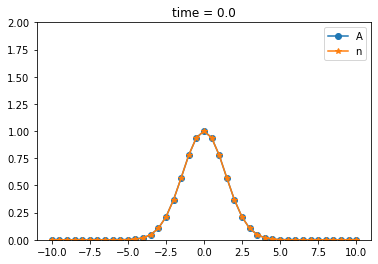

In [22]:
ani = animation.FuncAnimation(plt.figure(0), animate, frames=y.shape[0], interval=100)
ani.save("heat.mp4")

In [23]:
plt.show()